In [12]:
# libraries
import copy
from itertools import tee
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import pdb
import json
from os.path import join as path_join
import cv2
from skimage import measure

In [13]:
# load data
def load_data(path):
    tasks = pd.Series()
    for file_path in os.listdir(path):
        task_file = path_join(path, file_path)
        with open(task_file, 'r') as f:
            task = json.load(f)
        tasks[file_path[:-5]] = task
    return tasks

train_tasks = load_data('../ARC-master/data/training/')

/Users/a18220706/.conda/envs/kaggle-arc/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


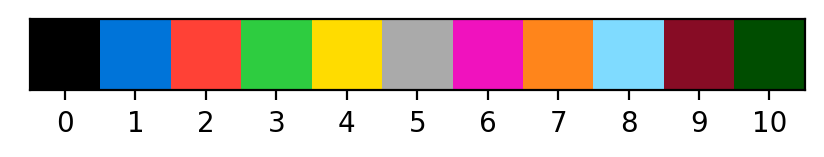

In [14]:
# standardize plotting colors
cmap = colors.ListedColormap(['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
                             '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25', '#004d00'])
BACKGROUND_COLOR = 10
norm = colors.Normalize(vmin = 0, vmax = 10)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
# 10:darkgeen
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(11))], cmap=cmap, norm=norm)
plt.xticks(list(range(11)))
plt.yticks([])
plt.show()
        

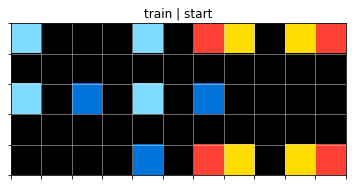

<Figure size 1000x1000 with 0 Axes>

checked dsl: [<ActionType.SET_BACK: 0>, [<TargetColor.COLOR0: (0,)>], <ActionType.ADD_OBJ: 1>, [<ObjectDetectionMethod.BY_COLOR: 0>, <TargetObject.ALL: 0>], <ActionType.SORT: 4>, [<ObjectParam.COLOR: 0>, <SortOrder.NORMAL: 0>], <ActionType.MV_OBJ: 2>, [<TargetObject.ALL: 0>, <MoveDirection.UP: 0>, <MoveTarget.TILL_EDGE: 0>], <ActionType.SORT: 4>, [<ObjectParam.COLOR: 0>, <SortOrder.NORMAL: 0>], <ActionType.SET_OBJ_CLR: 3>, [<TargetObject.ALL: 0>, <TargetColor.COLOR0: (0,)>], <ActionType.RESIZE_GRID: 5>, [<ResizeGridType.CUT_TO_OBJECTS: 0>]]
variants_checked: 1
checked dsl: [<ActionType.SET_BACK: 0>, [<TargetColor.COLOR0: (0,)>], <ActionType.ADD_OBJ: 1>, [<ObjectDetectionMethod.BY_COLOR: 0>, <TargetObject.ALL: 0>], <ActionType.SORT: 4>, [<ObjectParam.COLOR: 0>, <SortOrder.NORMAL: 0>], <ActionType.MV_OBJ: 2>, [<TargetObject.ALL: 0>, <MoveDirection.UP: 0>, <MoveTarget.TILL_EDGE: 0>], <ActionType.SORT: 4>, [<ObjectParam.COLOR: 0>, <SortOrder.NORMAL: 0>], <ActionType.SET_OBJ_CLR: 3>, [<Targ

/Users/a18220706/.conda/envs/kaggle-arc/lib/python3.6/site-packages/ipykernel_launcher.py:428: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


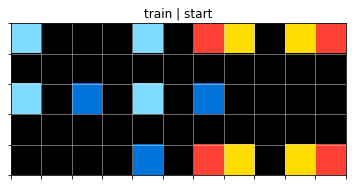

<Figure size 1000x1000 with 0 Axes>

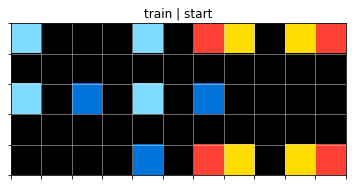

<Figure size 1000x1000 with 0 Axes>

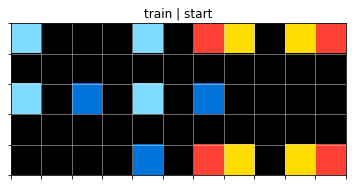

<Figure size 1000x1000 with 0 Axes>

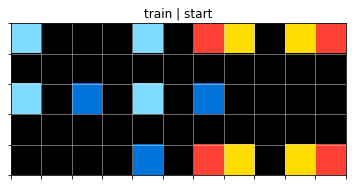

<Figure size 1000x1000 with 0 Axes>

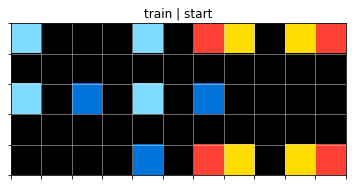

<Figure size 1000x1000 with 0 Axes>

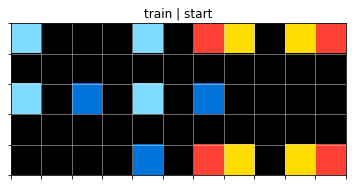

<Figure size 1000x1000 with 0 Axes>

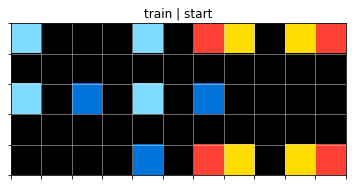

<Figure size 1000x1000 with 0 Axes>

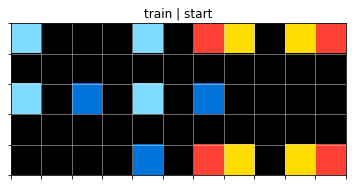

<Figure size 1000x1000 with 0 Axes>

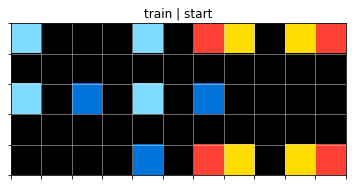

<Figure size 1000x1000 with 0 Axes>

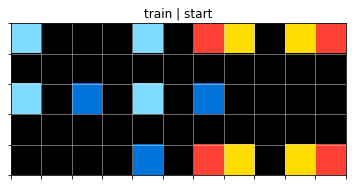

<Figure size 1000x1000 with 0 Axes>

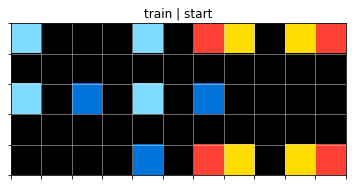

<Figure size 1000x1000 with 0 Axes>

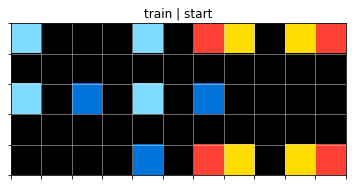

<Figure size 1000x1000 with 0 Axes>

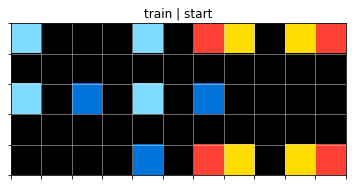

<Figure size 1000x1000 with 0 Axes>

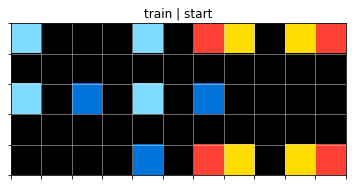

<Figure size 1000x1000 with 0 Axes>

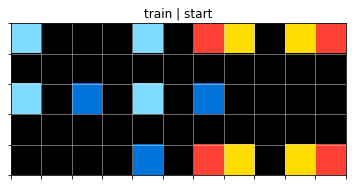

<Figure size 1000x1000 with 0 Axes>

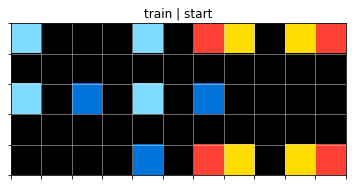

<Figure size 1000x1000 with 0 Axes>

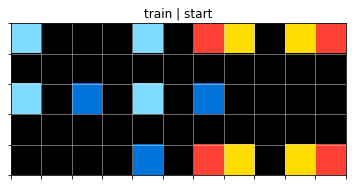

<Figure size 1000x1000 with 0 Axes>

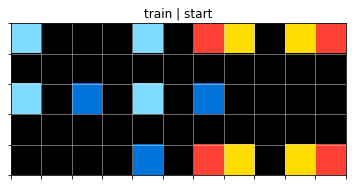

<Figure size 1000x1000 with 0 Axes>

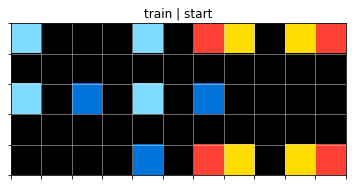

<Figure size 1000x1000 with 0 Axes>

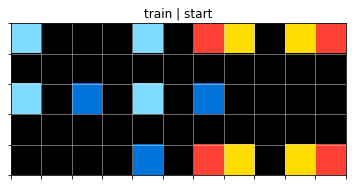

<Figure size 1000x1000 with 0 Axes>

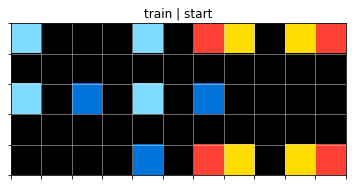

<Figure size 1000x1000 with 0 Axes>

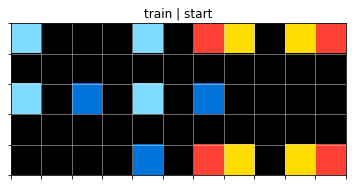

<Figure size 1000x1000 with 0 Axes>

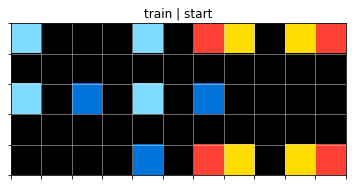

<Figure size 1000x1000 with 0 Axes>

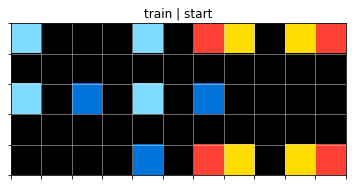

<Figure size 1000x1000 with 0 Axes>

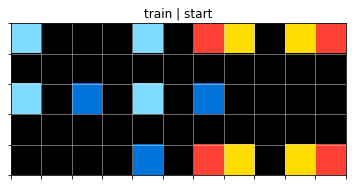

<Figure size 1000x1000 with 0 Axes>

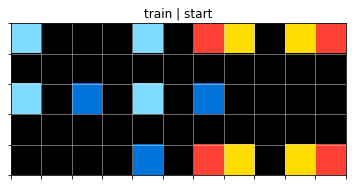

<Figure size 1000x1000 with 0 Axes>

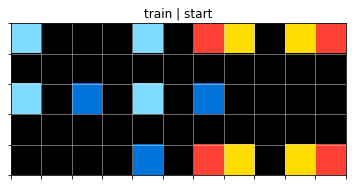

<Figure size 1000x1000 with 0 Axes>

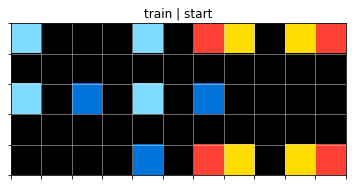

<Figure size 1000x1000 with 0 Axes>

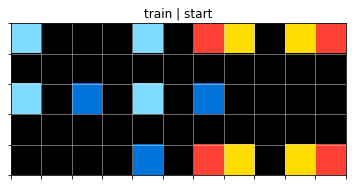

<Figure size 1000x1000 with 0 Axes>

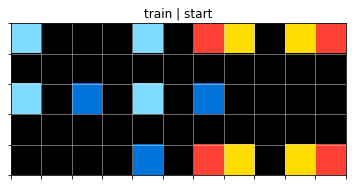

<Figure size 1000x1000 with 0 Axes>

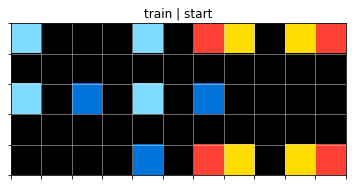

<Figure size 1000x1000 with 0 Axes>

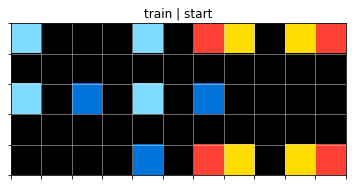

<Figure size 1000x1000 with 0 Axes>

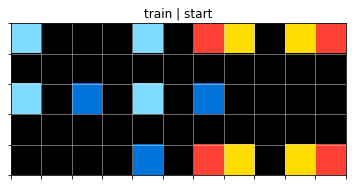

<Figure size 1000x1000 with 0 Axes>

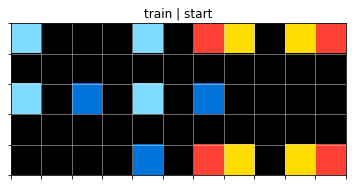

<Figure size 1000x1000 with 0 Axes>

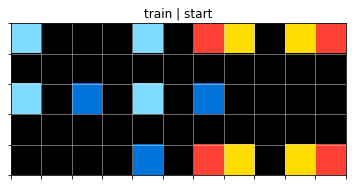

<Figure size 1000x1000 with 0 Axes>

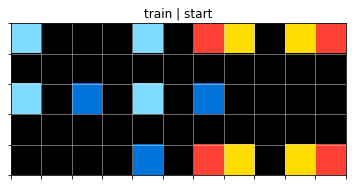

<Figure size 1000x1000 with 0 Axes>

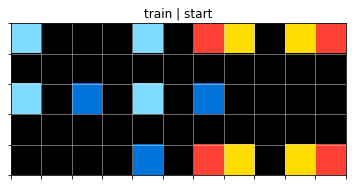

<Figure size 1000x1000 with 0 Axes>

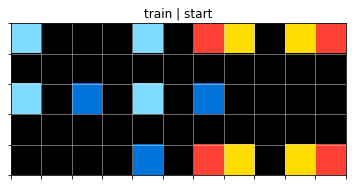

<Figure size 1000x1000 with 0 Axes>

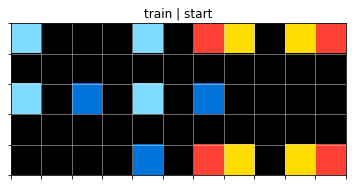

<Figure size 1000x1000 with 0 Axes>

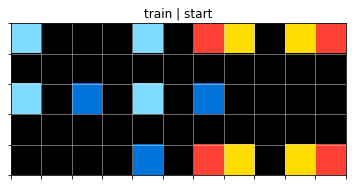

<Figure size 1000x1000 with 0 Axes>

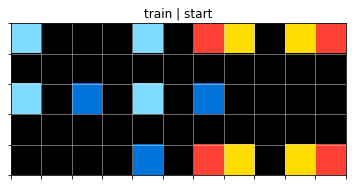

<Figure size 1000x1000 with 0 Axes>

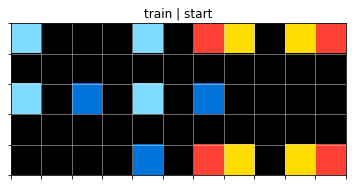

<Figure size 1000x1000 with 0 Axes>

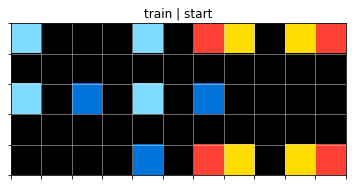

<Figure size 1000x1000 with 0 Axes>

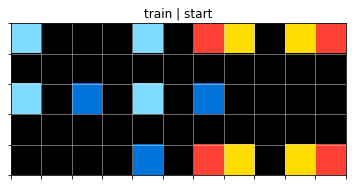

<Figure size 1000x1000 with 0 Axes>

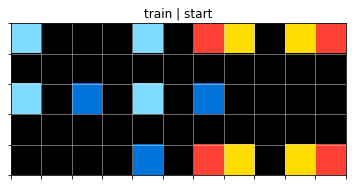

<Figure size 1000x1000 with 0 Axes>

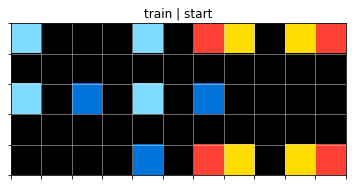

<Figure size 1000x1000 with 0 Axes>

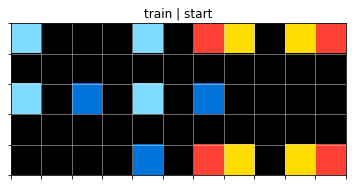

<Figure size 1000x1000 with 0 Axes>

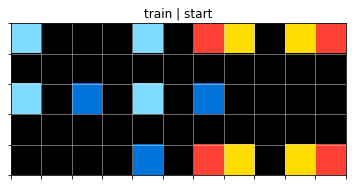

<Figure size 1000x1000 with 0 Axes>

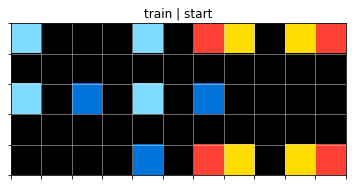

<Figure size 1000x1000 with 0 Axes>

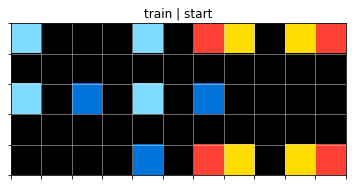

<Figure size 1000x1000 with 0 Axes>

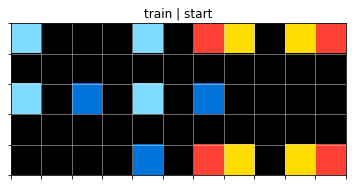

<Figure size 1000x1000 with 0 Axes>

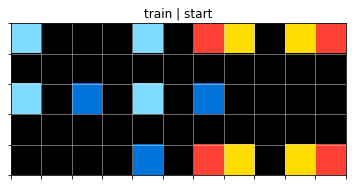

<Figure size 1000x1000 with 0 Axes>

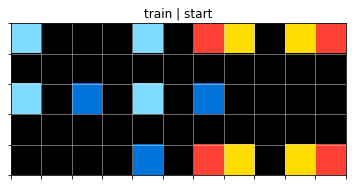

<Figure size 1000x1000 with 0 Axes>

KeyboardInterrupt: 

In [51]:
from enum import Enum

class EnumWithNames(Enum):
    
    @classmethod
    def from_str(cls, name):        
        return cls.name_to_val[name]
    
    @classmethod
    def init_enum(cls):
        cls.name_to_val = { value.name.lower(): value for value in cls }

class ObjectDetectionMethod(EnumWithNames):
    BY_COLOR = 0
    BY_ISOLATION = 1
    BY_COLOR_AND_ISOLATION = 2
    
ObjectDetectionMethod.init_enum()
    

class DetectedObject:
    def __init__(self, img, inx, pos):
        self.img = img
        self.inx = inx # the original index of the identified objects (io)
        self.pos = np.array(pos)        
        self.height = img.shape[0] # height of io
        self.width = img.shape[1] # width of io
        self.shape = np.array(img.shape)
        # count of non-background pixels
        self.pixel_count = img[img != BACKGROUND_COLOR].shape[0]
        # overall square cells count
        self.size = img.size
        nc, c = np.unique(img, return_counts = True)
        # number of unique colors
        self.unique_colors = nc
        # the dominating color
        self.color = nc[np.argmax(c)]
        
    # attributes to sort objects
    def attrs(self):
        return {
            'color': self.color,
            'size': self.height * self.width,
            'pos_y': self.pos[0],
            'pos_x': self.pos[1],
            'pixel_count': self.pixel_count,
            'height': self.height,
            'width': self.width
            #TODO: number of shared sides with other objects
        }
        
    def change_color(self, color):
        self.color = color
        print('change_color img befor:', self.img)
        self.img[self.img != BACKGROUND_COLOR] = color
        print('change_color img after:', self.img)
        
    def move(self, pos):
        self.pos = pos
        
    def move_till(self, pos, direction):
        if direction == MoveDirection.UP:
            self.pos[0] = pos
        elif direction == MoveDirection.DOWN:
            self.pos[0] = pos - self.height
        elif direction == MoveDirection.LEFT:
            self.pos[1] = pos
        elif direction == MoveDirection.RIGHT:
            self.pos[1] = pos - self.width
        else:
            raise RuntimeError('Wrong MoveDirection')
        
    def move_to(self, obj, target):
        assert target == MoveTarget.CENTERED, 'target should be CENTERED'
        self.pos = (obj.pos + obj.shape / 2 - self.shape / 2).astype(int)
        print('move to self.pos', self.pos)

        
class TargetObject(EnumWithNames):
    ALL = 0
    TOP = 1
    BOTTOM = 2
    
    @staticmethod
    def get_objects(objects, target_object):
        if target_object == TargetObject.ALL:
            return objects
        if target_object == TargetObject.TOP:
            return [objects[-1]]
        if target_object == TargetObject.BOTTOM:
            return [objects[0]]
        raise RuntimeError(f'Wrong target object {target_object}')
    
TargetObject.init_enum()


class MoveDirection(EnumWithNames):
    UP = 0
    DOWN = 1
    RIGHT = 2
    LEFT = 3
    TO_TOP_OBJECT = 4
    
MoveDirection.init_enum()


class MoveTarget(EnumWithNames):
    TILL_EDGE = 0
    CENTERED = 1
    
MoveTarget.init_enum()


class TargetColor(EnumWithNames):
    COLOR0 = 0,
    COLOR1 = 1,
    COLOR2 = 2,
    COLOR3 = 3,
    COLOR4 = 4,
    COLOR5 = 5,
    COLOR6 = 6,
    COLOR7 = 7,
    COLOR8 = 8,
    COLOR9 = 9,
    COLOR10 = 10,
    TOP_OBJECT = 11,
    BOTTOM_OBJECT = 12
    
    @staticmethod
    def to_color(target_color, objects):
        if target_color == TargetColor.TOP_OBJECT:
            return objects[-1].color
        if target_color == TargetColor.BOTTOM_OBJECT:
            return objects[0].color
        color = target_color.value[0]
        assert color >= 0
        assert color < len(cmap.colors)
        return color

TargetColor.init_enum() 


class SortOrder(EnumWithNames):
    NORMAL = 0
    REVERSE = 1

SortOrder.init_enum()


class ObjectParam(EnumWithNames):
    COLOR = 0
    SIZE = 1
    POS_X = 2
    POS_Y = 3
    PIXEL_COUNT = 4
    HEIGHT = 5
    WIDTH = 6
    
ObjectParam.init_enum()


class ResizeGridType(EnumWithNames):
    CUT_TO_OBJECTS = 0
    
ResizeGridType.init_enum()


class Utils:
    @staticmethod
    def crop(img, min, max):
        return img[min[0]:max[0], min[1]:max[1]]
    
    @staticmethod
    def slices(min, max):
        return (slice(min[0],max[0]), slice(min[1],max[1]))
        
class OutputGrid:
    def __init__(self, name, shape, background_color, identified_objects):
        self.name = name
        self.shape = shape
        self.objects = []
        self.background_color = background_color
        self.identified_objects = identified_objects
        
    def increment_name(self, name=None):
        tokens = self.name.split('|')
        if not tokens:
            return
        try:
            index = int(tokens[-1])
        except Exception:
            index = 0
        if name:
            self.name = '|'.join(tokens[:-1]) + ' | ' + name
        else:
            self.name = '|'.join(tokens[:-1]) + ' | ' + str(index + 1)
        
    def add_obj(self, detection_method, target_object):
        assert detection_method in self.identified_objects, f'Wrong detection_method {detection_method}'
        group = self.identified_objects[detection_method]
        objects = TargetObject.get_objects(group, target_object)
        self.objects += objects
        
    def sort(self, attr, sort_order):
        self.objects.sort(key=lambda x: x.attrs()[attr.name.lower()], reverse=(sort_order==SortOrder.REVERSE))
        
    def set_back(self, background_color):
        self.background_color = TargetColor.to_color(background_color, self.objects)
        
    def get_target_objects(self, target_object):
        return TargetObject.get_objects(self.objects, target_object)
        
    def set_obj_clr(self, target_object, target_color):
        return
        color = TargetColor.to_color(target_color, self.objects)
        print('set_obj_clr:', color)
        objects = self.get_target_objects(target_object)
        for obj in objects:
            obj.change_color(color)
            
    def mv_obj(self, target_object, move_direction, move_target):
        objects = self.get_target_objects(target_object)
        
        for obj in objects:
            self.move_object(obj, move_direction, move_target)
            
    def get_edge(self, direction):
        if direction == MoveDirection.UP:
            return 0
        elif direction == MoveDirection.DOWN:
            return self.shape[0]
        elif direction == MoveDirection.LEFT:
            return 0
        elif direction == MoveDirection.RIGHT:
            return self.shape[1]
        else:
            raise RuntimeError(f'Wrong MoveDirection {direction}')

    def move_object(self, obj, direction, target):
        if direction in { MoveDirection.UP, MoveDirection.DOWN, MoveDirection.LEFT, MoveDirection.RIGHT }:
            assert target == MoveTarget.TILL_EDGE, 'target should be TILL_EDGE'
            obj.move_till(self.get_edge(direction), direction)
        elif direction == MoveDirection.TO_TOP_OBJECT:
            obj.move_to(self.get_target_objects(TargetObject.TOP)[0], target)
        else:
            raise RuntimeError(f'Unknown direction {direction}')
        
    def plot(self):
        img = np.full(self.shape, self.background_color)
        for obj in self.objects:
            # draw only part object inside grid
            delta_min = np.maximum(-obj.pos, np.zeros(2)).astype(int)
            obj_pos = obj.pos + delta_min
            delta_max = np.maximum(obj.pos + obj.shape - self.shape, np.zeros(2)).astype(int)
            obj_img = Utils.crop(obj.img, delta_min, obj.shape - delta_max)
            img_crop = Utils.crop(img, obj_pos, obj_pos + obj_img.shape)
            # not filling background color
            no_back_mask = obj_img != BACKGROUND_COLOR
            img_crop[no_back_mask] = obj_img[no_back_mask]
            img[Utils.slices(obj_pos, obj_pos + obj_img.shape)] = img_crop
        
        fig, ax = plt.subplots()
        plt.figure(figsize=(5, 5), dpi=200)
        ax.imshow(img, cmap=cmap, norm=norm)
        ax.grid(True, which='both',color='lightgrey', linewidth=0.5)
        ax.set_yticks([x-0.5 for x in range(1+len(img))])
        ax.set_xticks([x-0.5 for x in range(1+len(img[0]))])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title(self.name)
        plt.tight_layout()
        plt.show()
        return img
        
    def resize_grid(self, type):
        assert type == ResizeGridType.CUT_TO_OBJECTS, f'Wrong ResizeGridType: {type}'
        delta_min = self.shape
        delta_max = np.zeros(2)
        if not self.objects:
            # no objects, skip resizing grid
            return
        for obj in self.objects:
            delta_min = np.minimum(obj.pos, delta_min).astype(int)
            delta_max = np.maximum(obj.pos + obj.shape, delta_max).astype(int)
        delta_max = np.minimum(self.shape, delta_max).astype(int)
        self.shape = delta_max - delta_min
        assert np.all(self.shape > 0), 'shape should be positive'
        # update objects position
        for obj in self.objects:
            obj.pos -= delta_min
            
    @staticmethod
    def get_background(image):
        # if image contains 0 
        if 0 in image:
          background = 0
        # else use the most frequent pixel color
        else: 
          unique_colors, counts = np.unique(image, return_counts=True)
          background = unique_colors[np.argmax(counts)]
        return background


class ActionType(EnumWithNames):
    SET_BACK = 0
    ADD_OBJ = 1
    MV_OBJ = 2
    SET_OBJ_CLR = 3
    SORT = 4
    RESIZE_GRID = 5
    
ActionType.init_enum()


ACTIONS_ARGUMENT_TYPES = {
    ActionType.SET_BACK: (TargetColor, ),
    ActionType.ADD_OBJ: (ObjectDetectionMethod, TargetObject),
    ActionType.MV_OBJ: (TargetObject, MoveDirection, MoveTarget),
    ActionType.SET_OBJ_CLR: (TargetObject, TargetColor),
    ActionType.SORT: (ObjectParam, SortOrder),
    ActionType.RESIZE_GRID: (ResizeGridType, )
}


class Action:
    def __init__(self, type, target):
        self.type = type
        self.target = target
        
    def __call__(self, grid):
        method = getattr(grid, self.type.name.lower())
        method(*self.target)
        
    def __str__(self):
        return f'{self.type} {self.target}'


class ArgsGenerator:
    def __init__(self, action_type):
        self.args_type = list(ACTIONS_ARGUMENT_TYPES[action_type])
        self.args_variants = [[arg_val for arg_val in arg_type] for arg_type in self.args_type]
        
    def __iter__(self):
        self.args = [0] * len(self.args_type)
        self.arg_i = len(self.args_type) - 1
        self.args[self.arg_i] = -1
        return self
    
    def __next__(self):
        self.args[self.arg_i] += 1
        if self.args[self.arg_i] >=  len(self.args_variants[self.arg_i]):
            self.args[self.arg_i] = 0
            self.arg_i -= 1
            if self.arg_i < 0:
                raise StopIteration
            return next(self)

        self.arg_i = len(self.args) - 1
        return [self.args_variants[arg_i][var_i] for arg_i, var_i in enumerate(self.args)]


GENERATOR_VARIANTS = [
    (ActionType.SET_BACK, (0, 1)),
    (ActionType.ADD_OBJ, (1, 1)),
    (ActionType.SORT, (0, 1)),
    (ActionType.MV_OBJ, (0, 1)),
    (ActionType.SORT, (0, 1)),
    (ActionType.SET_OBJ_CLR, (0, 1)),
    (ActionType.RESIZE_GRID, (0, 1))
]


class DSLGenerator:
    def __init__(self, train):
        self.train = train
    
    def generate(self, arc):
        suitable_dsl = None
        for train_pair in self.train:
            input = np.array(train_pair['input'])
            self.output = np.array(train_pair['output'])
            
            if suitable_dsl is None:
                suitable_dsl = self.find_suitable_dsl(arc, input)
            
            if not suitable_dsl:
                break
            suitable_dsl = self.filter_suitable_dsls(input, self.output, suitable_dsl)
            
        if suitable_dsl is None:
            suitable_dsl = []
        return suitable_dsl
                
    def filter_suitable_dsls(self, input, output, dsls):
        suitable_dsl = []
        for dsl in dsls:
            self.evaluate_dsl(dsl, input)
            if np.all(input == output):
                suitable_dsl += dsl
        print(f'filter_suitable_dsls: from {len(dsls)} to {len(suitable_dsl)}')
        return suitable_dsl
        
    def evaluate_dsl(self, dsl, grid):
        action = Action(dsl[0], dsl[1])
        action(grid)
            
    def find_suitable_dsl(self, arc, input):

        background = OutputGrid.get_background(input)

        for object_detection_method in ObjectDetectionMethod:
            arc.identify_object(input, object_detection_method)

        grid = OutputGrid(f'train | start', input.shape, background, arc.identified_objects)
        
        self.results = []
        self.variants_checked = 0
        action_logs = []
        self.step_action_calls(grid, iter(GENERATOR_VARIANTS), action_logs)
        return self.results
        
        
    def step_action_calls(self, grid, gen_variants, actions_log):
        variant = next(gen_variants, None)
        if not variant:
            # Bottom of the graph
            res_img = grid.plot()
            res_correct = np.all(res_img == self.output)
            if res_correct:
                print('found suitable dsl:', actions_log)
                self.results += actions_log
            else:
                print('checked dsl:', actions_log)
            self.variants_checked += 1
            print('variants_checked:', self.variants_checked)
            return
        
        action_type, calls_range = variant
        for calls_n in range(calls_range[0], calls_range[1] + 1):
            for i in range(calls_n):
                grid_tmp = copy.deepcopy(grid)
                gen_variants, gen_variants_tmp = tee(gen_variants)
                actions_log_tmp = actions_log.copy()
                self.step_action(grid_tmp, gen_variants_tmp, actions_log_tmp, action_type)
         
    def step_action(self, grid, gen_variants, actions_log, action_type):
        for args in ArgsGenerator(action_type):
            tmp_grid = copy.deepcopy(grid)
            gen_variants, gen_variants_tmp = tee(gen_variants)
            actions_log_tmp = actions_log.copy()
            self.step_action_args(tmp_grid, gen_variants_tmp, actions_log_tmp, action_type, args)
            
            
            
    def step_action_args(self, grid, gen_variants, actions_log, action_type, args):
        Action(action_type, args)(grid)
        actions_log += (action_type, args)
        
        # And go further on action list
        self.step_action_calls(grid, gen_variants, actions_log)


class ExpressionParser:
    ACTIONS_DELIMITER = ';'
    ARGUMENTS_DELIMITER = ','
    
    def __init__(self, exp):
        self.exp = exp
        self.actions = []
        self.actions_str = []
        self.parse()
        
    def __call__(self, grid, plot_each_action=False):
        assert len(self.actions_str) == len(self.actions), f'{len(self.actions_str)} != {len(self.actions)}'
        for action_str, action in zip(self.actions_str, self.actions):
            print(f'running action: {action_str} {action}')
            action(grid)
            grid.increment_name(action_str)
            if plot_each_action:
                grid.plot()
        
        return grid            
        
    def parse(self):
        actions_str = [x.strip() for x in self.exp.split(self.ACTIONS_DELIMITER)]
        self.actions_str = actions_str
        for action_str in actions_str:
            self.actions.append(self.parse_action(action_str))
        
    def parse_action(self, action_str):
        scope_o = action_str.find('(')
        action_name_str = action_str
        if scope_o != -1:
            action_name_str = action_str[:scope_o].strip()
        action_type = ActionType.from_str(action_name_str)
        
        arg_values = None
        if scope_o != -1:
            scope_c = action_str.find(')', scope_o)
            assert scope_c != -1, "Wrong expression, no closing scope"
            arguments_one_str = action_str[scope_o+1:scope_c]
            arg_values = self.parse_arguments(arguments_one_str, action_type)
        return Action(action_type, arg_values)
                
                
    def parse_arguments(self, arguments_one_str, action_type):
        arguments_str = [x.strip() for x in arguments_one_str.split(self.ARGUMENTS_DELIMITER)]
        assert action_type in ACTIONS_ARGUMENT_TYPES, f'Wrong action type: {action_type}'
        arguments = ACTIONS_ARGUMENT_TYPES[action_type]
        arguments_list = list(arguments)
        assert len(arguments_list) == len(arguments_str),\
            f'Wrong arguments number {len(arguments_list)} != {len(arguments_str)},' \
            f' for action {action_type.name}, arguments_list {arguments_list},' \
            f' arguments_str {arguments_str}'
        arg_values = []
        for arg_type, arg_str in zip(arguments_list, arguments_str):
            arg_value = arg_type.from_str(arg_str)
            arg_values.append(arg_value)
        return tuple(arg_values)
        

class ARCSolver:
    def __init__(self, task_num):
        self.task_num = task_num
        # initialize objects-related things
        self.identified_objects = {}
        
    def reset(self):
        self.identified_objects = {}
        
    
    def plot_one(self, task, ax, i, train_or_test, input_or_output):
        input_matrix = task[train_or_test][i][input_or_output]
        ax.imshow(input_matrix, cmap=cmap, norm=norm)
        ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
        ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
        ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title(train_or_test + ' '+input_or_output)
        
    
    def plot_task(self):
        """
        Plots the first train and test pairs of a specified task,
        using same color scheme as the ARC app
        """    
        task = train_tasks[self.task_num]
        name = train_tasks.keys()[self.task_num]
        print('task:', name)
        num_train = len(task['train'])
        fig, axs = plt.subplots(2, num_train, figsize=(3*num_train,3*2))
        for i in range(num_train):     
            self.plot_one(task, axs[0,i],i,'train','input')
            self.plot_one(task, axs[1,i],i,'train','output')        
        plt.tight_layout()
        plt.show()        
            
        num_test = len(task['test'])
        fig, axs = plt.subplots(2, num_test, figsize=(3*num_test,3*2))
        if num_test==1: 
            self.plot_one(task, axs[0],0,'test','input')
            self.plot_one(task, axs[1],0,'test','output')     
        else:
            for i in range(num_test):      
                self.plot_one(task, axs[0,i],i,'test','input')
                self.plot_one(task, axs[1,i],i,'test','output')  
        plt.tight_layout()
        plt.show() 
        
    
    def plot_identified_objects(self, identified_objects, title = 'objects'):
        # do not plot anything in the following situations
        if len(identified_objects) == 0:
            print('No objects were identified.')
            return
        # if len(identified_objects) > 10:
        #     print('Way too many objects (>10). Not gonna plot them.')
        #     return
        
        fig, axs = plt.subplots(1, len(identified_objects) + 1, figsize = (8,2))
        for i in range(len(identified_objects) + 1):
            if i == 0:
                axs[0].text(0.5, 0.5, title, horizontalalignment = 'center', verticalalignment = 'center', fontsize = 15)
                axs[0].get_xaxis().set_visible(False)
                axs[0].get_yaxis().set_visible(False)
                axs[0].axis('off')
            else:
                obj = identified_objects[i-1]
                axs[i].imshow(obj.img, cmap = cmap, norm = norm)
                axs[i].axis('off')
                axs[i].set_title('object{}'.format(i))
        plt.tight_layout()
        plt.show()
    
    
    def check_pairs(self, inx_pairs, this_pair, return_inx = False):
        # check if this_pair is in inx_pairs
        match = []
        for pair in inx_pairs:
          if pair[0] == this_pair[0] and pair[1] == this_pair[1]:
            match.append(True)
          else:
            match.append(False)
        if return_inx:
          return any(match), np.where(match)
        else:
          return any(match)
    
    
    def check_neighbors(self, all_pairs, this_pair, objectness, this_object):
        # all_pairs: an array of index pairs for all nonzero/colored pixels
        # this_pair: the index pair whose neighbors will be checked
        # objectness: an array with the shape of original image, storage for how much objectness has been identified
        # this_object: the current object we are looking at
        row_inx = this_pair[0]
        col_inx = this_pair[1]
        objectness[row_inx, col_inx] = this_object
        # find if any neighboring pixels contain color
        if self.check_pairs(all_pairs, [row_inx-1, col_inx-1]): # up-left
          objectness[row_inx-1, col_inx-1] = this_object
        if self.check_pairs(all_pairs, [row_inx-1, col_inx]): # up
          objectness[row_inx-1, col_inx] = this_object 
        if self.check_pairs(all_pairs, [row_inx-1, col_inx+1]): # up-right
          objectness[row_inx-1, col_inx+1] = this_object
        if self.check_pairs(all_pairs, [row_inx, col_inx-1]): # left
          objectness[row_inx, col_inx-1] = this_object
        if self.check_pairs(all_pairs, [row_inx, col_inx+1]): # right
          objectness[row_inx, col_inx+1] = this_object
        if self.check_pairs(all_pairs, [row_inx+1, col_inx-1]): # down-left
          objectness[row_inx+1, col_inx-1] = this_object
        if self.check_pairs(all_pairs, [row_inx+1, col_inx]): # down
          objectness[row_inx+1, col_inx] = this_object
        if self.check_pairs(all_pairs, [row_inx+1, col_inx+1]): # down-right
          objectness[row_inx+1, col_inx+1] = this_object
        return objectness
    
    
    def identify_object_by_color(self, true_image, background = 0):
        # identify object by the color only 
        unique_colors = np.unique(true_image)
        identified_objects = []
        for i, color in enumerate(unique_colors):
          image = np.copy(true_image) # make a copy from original first
          if color == background: 
            continue
          image[image != color] = BACKGROUND_COLOR
          inx = np.where(image == color)
          pos = np.min(inx[0]), np.min(inx[1])
          img = image[np.min(inx[0]):np.max(inx[0])+1, np.min(inx[1]):np.max(inx[1])+1]
          obj = DetectedObject(img, len(identified_objects), pos)
          # append the object attributes
          identified_objects.append(obj)
        return identified_objects
    
    
    def identify_object_by_isolation(self, image, background = 0):
        # identify all objects by physical isolation on the given image
        all_pairs = np.array(np.where(image != background)).T
        objectness = np.zeros(image.shape)
        identified_objects = []
        this_object = 1
        while len(all_pairs) >= 1:
          init_pair = all_pairs[0] # start with the first pair
          objectness = self.check_neighbors(all_pairs, init_pair, objectness, this_object)
          # get a list of index pairs whose neghbors haven't been checked
          unchecked_pairs = np.array(np.where(objectness == this_object)).T
          checked_pairs = np.zeros((0,2)) 
          # check all the index pairs in the expanding unchecked_pairs untill all have been checked
          while len(unchecked_pairs) != 0:
            this_pair = unchecked_pairs[0]
            objectness = self.check_neighbors(all_pairs, this_pair, objectness, this_object)
            # append the checked_pairs
            checked_pairs = np.vstack((checked_pairs, this_pair))
            # get all index pairs for the currently identified object
            current_object_pairs = np.array(np.where(objectness == this_object)).T
            # delete the checked pairs from current object pairs
            checked_inx = []
            for pair in checked_pairs:
              _, inx = self.check_pairs(current_object_pairs, pair, return_inx = True)
              checked_inx.append(inx[0][0])
            unchecked_pairs = np.delete(current_object_pairs, checked_inx, axis = 0)
    
          # store this object to identified_objects
          current_object_pairs = np.array(np.where(objectness == this_object)).T
          cop = current_object_pairs.T
          pos = np.min(cop[0]), np.min(cop[1])
          img = image[np.min(cop[0]):np.max(cop[0])+1, np.min(cop[1]):np.max(cop[1])+1]
          img[img == background] = BACKGROUND_COLOR
          # delete the current object pairs from all_pairs 
          cop_inx = []
          for pair in current_object_pairs:
            _, this_cop_inx = self.check_pairs(all_pairs, pair, return_inx = True)
            cop_inx.append(this_cop_inx[0][0])
          all_pairs = np.delete(all_pairs, cop_inx, axis = 0)
          # append the object attributes
          obj = DetectedObject(img, len(identified_objects), pos)
          identified_objects.append(obj)          
          # start identifying a new object
          this_object += 1
        return identified_objects
    
    
    def identify_object_by_color_isolation(self, true_image, background = 0):
        # identify objects first by color then by physical isolation
        unique_colors = np.unique(true_image)
        for i, color in enumerate(unique_colors):
          image = np.copy(true_image) # make a copy from the original first
          if color == background:
            continue
          # identify objects by isolation in this color only 
          image[image != color] = BACKGROUND_COLOR
          return self.identify_object_by_isolation(image, background = BACKGROUND_COLOR)
    
    
    def identify_object(self, image, method):
        # a wrapper of different methods
        # in the future method can be a parameter to be learned
        # 1 = by_color, 2 = by_isolation, 3 = by_color_isolation
        background = OutputGrid.get_background(image)
        res = None
        if method == ObjectDetectionMethod.BY_COLOR:
            res = self.identify_object_by_color(image, background)
        elif method == ObjectDetectionMethod.BY_ISOLATION:
            res = self.identify_object_by_isolation(image, background)
        elif method == ObjectDetectionMethod.BY_COLOR_AND_ISOLATION:
            res = self.identify_object_by_color_isolation(image, background)
        else:
            raise RuntimeError('Wrong ObjectDetectionMethod')
        self.identified_objects[method] = res
        
        
    # def solve(self):
    #     self.plot_task()
    #     # select an image for object identification
    #     # WE USE TRAIN INPUT
    #     image = np.array(train_tasks[task_num]['train'][0]['input'])
    #     background = OutputGrid.get_background(image)
    # 
    #     for object_detection_method in ObjectDetectionMethod:
    #         self.identify_object(image, object_detection_method)
    #         self.plot_identified_objects(arc.identified_objects[object_detection_method], title = object_detection_method.name)
    #         
    #     grid0 = OutputGrid('grid 0', image.shape, background)
    #     for obj in self.identified_objects[ObjectDetectionMethod.BY_COLOR]:
    #         grid0.add_obj(obj)
    #     grid0.plot()
    #     
    #     exp_example = "add_obj(all); mv_obj(all, down, till_edge); mv_obj(all, right, till_edge)"
    # 
    #     expression = ExpressionParser(exp_example)
    #     expression()



# randomly select 20 task numbers
TASK_NUM = np.random.randint(1,400, size = 20)
TASK_NUM = [1]
for task_num in TASK_NUM:
    arc = ARCSolver(task_num)

    # arc.plot_task()
    # 
    # exp_example = "add_obj(by_color, all); sort(size, normal); mv_obj(top, down, till_edge); " \
    #               "mv_obj(top, right, till_edge); mv_obj(all, to_top_object, centered);" \
    #               "resize_grid(cut_to_objects)"
    # expression = ExpressionParser(exp_example)

    generator = DSLGenerator(train_tasks[task_num]['train'])
    dsls = generator.generate(arc)
    print('results dsls:', dsls)


    # for train_i, train_input in enumerate(train_tasks[task_num]['train']):

        # # select an image for object identification
        # image = np.array(train_input['input'])
        # background = arc.get_background(image)
        # 
        # for object_detection_method in ObjectDetectionMethod:
        #     arc.identify_object(image, object_detection_method)
        #     # arc.plot_identified_objects(arc.identified_objects[object_detection_method], title = object_detection_method.name)
        # 
        # grid0 = OutputGrid(f'train {train_i} | start', image.shape, background, arc.identified_objects)
        # 
        # grid1 = expression(grid0, plot_each_action=False)
        # res_img = grid1.plot()
        # res_correct = np.all(res_img == train_input['output'])
        # print('Result correct:', res_correct)


In [17]:
for args in ArgsGenerator(ActionType.MV_OBJ):
    print(args)

[<TargetObject.ALL: 0>, <MoveDirection.UP: 0>, <MoveTarget.TILL_EDGE: 0>]
[<TargetObject.ALL: 0>, <MoveDirection.UP: 0>, <MoveTarget.CENTERED: 1>]
[<TargetObject.ALL: 0>, <MoveDirection.DOWN: 1>, <MoveTarget.TILL_EDGE: 0>]
[<TargetObject.ALL: 0>, <MoveDirection.DOWN: 1>, <MoveTarget.CENTERED: 1>]
[<TargetObject.ALL: 0>, <MoveDirection.RIGHT: 2>, <MoveTarget.TILL_EDGE: 0>]
[<TargetObject.ALL: 0>, <MoveDirection.RIGHT: 2>, <MoveTarget.CENTERED: 1>]
[<TargetObject.ALL: 0>, <MoveDirection.LEFT: 3>, <MoveTarget.TILL_EDGE: 0>]
[<TargetObject.ALL: 0>, <MoveDirection.LEFT: 3>, <MoveTarget.CENTERED: 1>]
[<TargetObject.ALL: 0>, <MoveDirection.TO_TOP_OBJECT: 4>, <MoveTarget.TILL_EDGE: 0>]
[<TargetObject.ALL: 0>, <MoveDirection.TO_TOP_OBJECT: 4>, <MoveTarget.CENTERED: 1>]
[<TargetObject.TOP: 1>, <MoveDirection.UP: 0>, <MoveTarget.TILL_EDGE: 0>]
[<TargetObject.TOP: 1>, <MoveDirection.UP: 0>, <MoveTarget.CENTERED: 1>]
[<TargetObject.TOP: 1>, <MoveDirection.DOWN: 1>, <MoveTarget.TILL_EDGE: 0>]
[<Targ

In [51]:
a = np.diag((1, 2, 3))
a


In [56]:
a[((0,2), 1)]

In [62]:
slice(1,4)

In [18]:
[0] * 2

In [31]:
a = (0, 1)
[b for b in range(*a)]

[0]

In [5]:
a = iter(GENERATOR_VARIANTS)
a

In [8]:
next(a)

(<ActionType.ADD_OBJ: 1>, (1, 1))

In [35]:
TargetColor.to_color(TargetColor.COLOR1, [])

'#0074D9'

In [33]:
cmap.colors

['#000000',
 '#0074D9',
 '#FF4136',
 '#2ECC40',
 '#FFDC00',
 '#AAAAAA',
 '#F012BE',
 '#FF851B',
 '#7FDBFF',
 '#870C25',
 '#004d00']